In [57]:
import pandas as pd

df_alphafold = pd.read_csv('/home/ssahin/Desktop/temp_90ligand/temp_alphafold/final_df_alphafold.csv')
df_pdb = pd.read_csv('/home/ssahin/Desktop/temp_90ligand/temp_expPDB/final_df_pdb.csv')

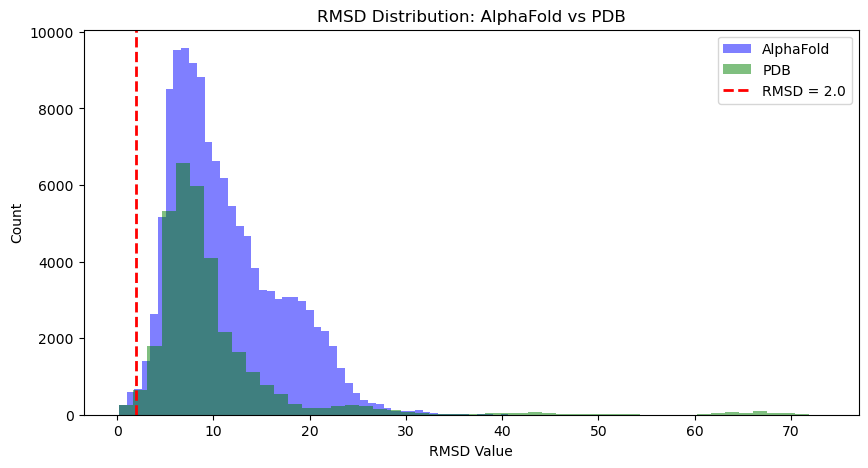

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_alphafold['RMSD'].dropna(), bins=50, alpha=0.5, label='AlphaFold', color='blue')
plt.hist(df_pdb['RMSD'].dropna(), bins=50, alpha=0.5, label='PDB', color='green')
plt.axvline(x=2.0, color='red', linestyle='--', linewidth=2, label='RMSD = 2.0')
plt.xlabel('RMSD Value')
plt.ylabel('Count')
plt.title('RMSD Distribution: AlphaFold vs PDB')
plt.legend()
plt.show()

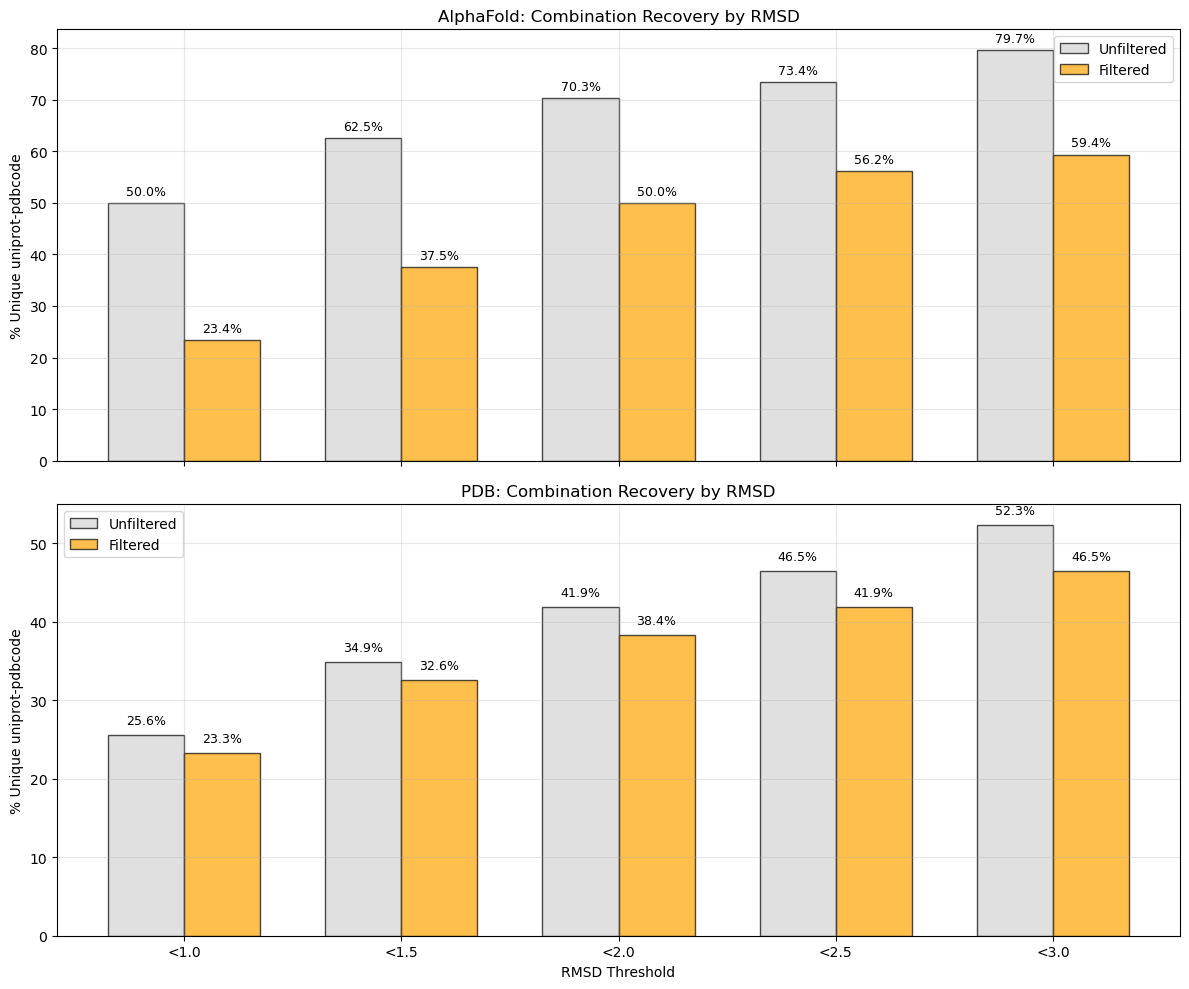

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Filtre fonksiyonu
def tool_specific_filter(row):
    if row['Tool1'] == 'SMINA' and row['Score1'] <= -7:
        return True
    if row['Tool1'] == 'LeDock' and row['Score1'] <= -5:
        return True
    if row['Tool1'] == 'GOLD' and row['Score1'] >= 70:
        return True
    if row['Tool2'] == 'SMINA' and row['Score2'] <= -7:
        return True
    if row['Tool2'] == 'LeDock' and row['Score2'] <= -5:
        return True
    if row['Tool2'] == 'GOLD' and row['Score2'] >= 70:
        return True
    return False

thresholds = [1.0, 1.5, 2.0, 2.5, 3.0]

def get_percentages(df):
    filtered_df = df[df.apply(tool_specific_filter, axis=1)].copy()
    rmsd_col = 'RMSD'
    def unique_combos(df, threshold):
        return df[df[rmsd_col] < threshold][['uniprot', 'pdbcode']].drop_duplicates().shape[0]
    total_combos = df[['uniprot', 'pdbcode']].drop_duplicates().shape[0]
    unique_combos_unfiltered = [unique_combos(df, t) for t in thresholds]
    percentage_unfiltered = [v / total_combos * 100 for v in unique_combos_unfiltered]
    unique_combos_filtered = [unique_combos(filtered_df, t) for t in thresholds]
    percentage_filtered = [v / total_combos * 100 for v in unique_combos_filtered]
    return percentage_unfiltered, percentage_filtered

# Yüzdelikleri hesapla
perc_unf_alphafold, perc_filt_alphafold = get_percentages(df_alphafold)
perc_unf_pdb, perc_filt_pdb = get_percentages(df_pdb)

x_pos = np.arange(len(thresholds))
width = 0.35

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# AlphaFold bar plot
bars1 = axes[0].bar(x_pos - width/2, perc_unf_alphafold, width, alpha=0.7, color='lightgray', edgecolor='black', label='Unfiltered')
bars2 = axes[0].bar(x_pos + width/2, perc_filt_alphafold, width, alpha=0.7, color='orange', edgecolor='black', label='Filtered')
axes[0].set_ylabel('% Unique uniprot-pdbcode')
axes[0].set_title('AlphaFold: Combination Recovery by RMSD')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
for bar, value in zip(bars1, perc_unf_alphafold):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)
for bar, value in zip(bars2, perc_filt_alphafold):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

# PDB bar plot
bars1 = axes[1].bar(x_pos - width/2, perc_unf_pdb, width, alpha=0.7, color='lightgray', edgecolor='black', label='Unfiltered')
bars2 = axes[1].bar(x_pos + width/2, perc_filt_pdb, width, alpha=0.7, color='orange', edgecolor='black', label='Filtered')
axes[1].set_xlabel('RMSD Threshold')
axes[1].set_ylabel('% Unique uniprot-pdbcode')
axes[1].set_title('PDB: Combination Recovery by RMSD')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'<{t}' for t in thresholds])
axes[1].legend()
axes[1].grid(True, alpha=0.3)
for bar, value in zip(bars1, perc_unf_pdb):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)
for bar, value in zip(bars2, perc_filt_pdb):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

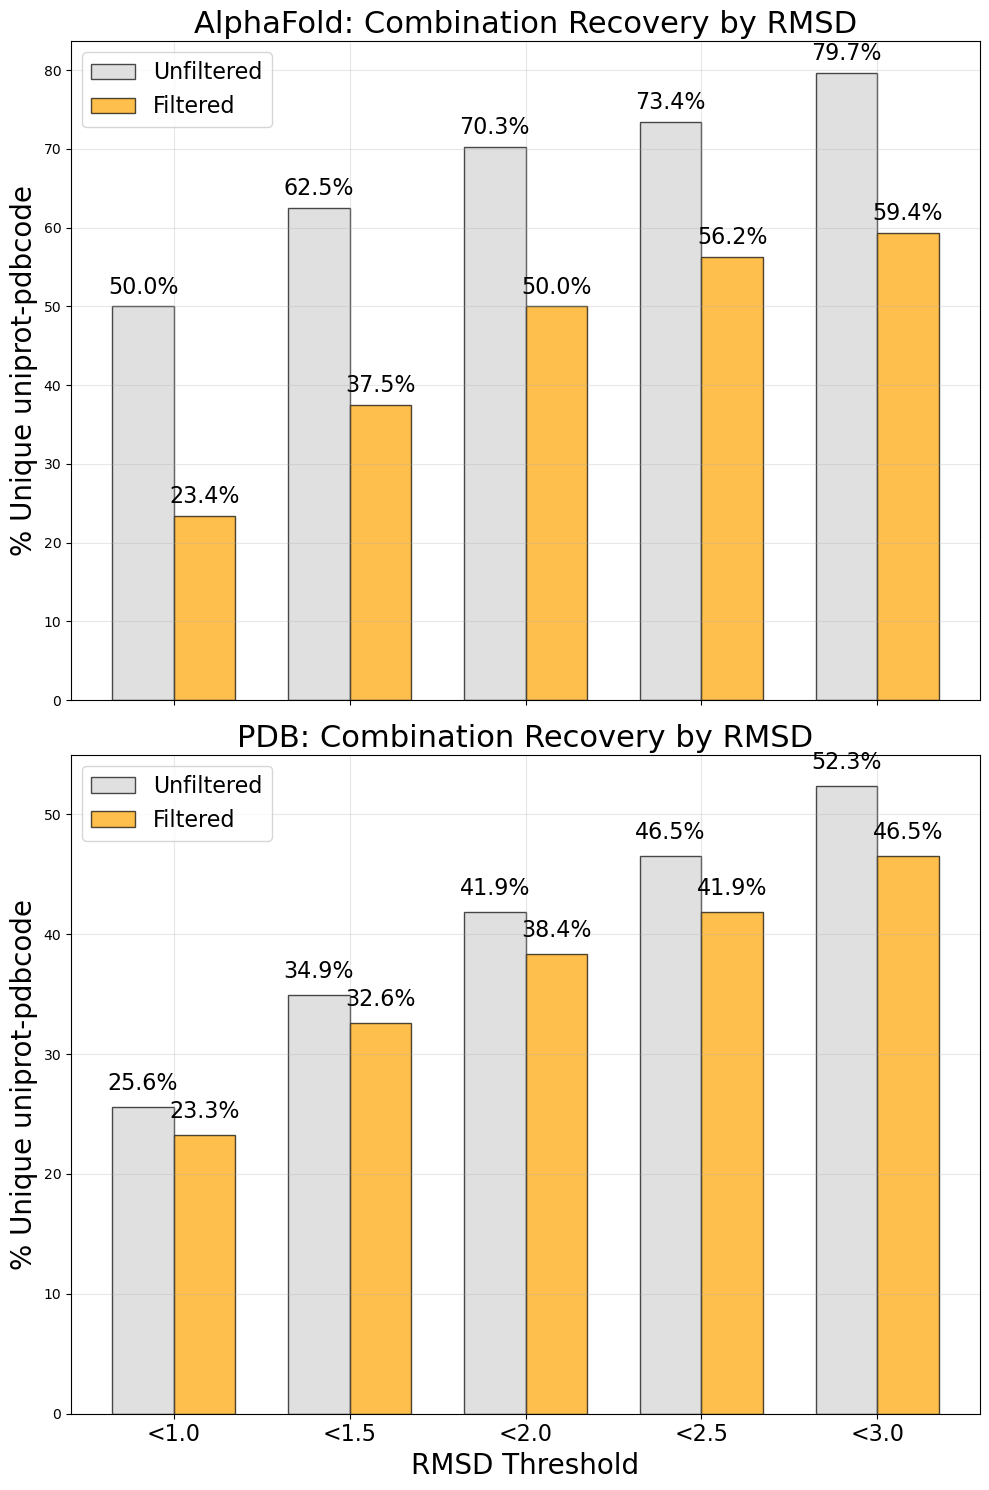

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Filtre fonksiyonu
def tool_specific_filter(row):
    if row['Tool1'] == 'SMINA' and row['Score1'] <= -7:
        return True
    if row['Tool1'] == 'LeDock' and row['Score1'] <= -5:
        return True
    if row['Tool1'] == 'GOLD' and row['Score1'] >= 70:
        return True
    if row['Tool2'] == 'SMINA' and row['Score2'] <= -7:
        return True
    if row['Tool2'] == 'LeDock' and row['Score2'] <= -5:
        return True
    if row['Tool2'] == 'GOLD' and row['Score2'] >= 70:
        return True
    return False

thresholds = [1.0, 1.5, 2.0, 2.5, 3.0]

def get_percentages(df):
    filtered_df = df[df.apply(tool_specific_filter, axis=1)].copy()
    rmsd_col = 'RMSD'
    def unique_combos(df, threshold):
        return df[df[rmsd_col] < threshold][['uniprot', 'pdbcode']].drop_duplicates().shape[0]
    total_combos = df[['uniprot', 'pdbcode']].drop_duplicates().shape[0]
    unique_combos_unfiltered = [unique_combos(df, t) for t in thresholds]
    percentage_unfiltered = [v / total_combos * 100 for v in unique_combos_unfiltered]
    unique_combos_filtered = [unique_combos(filtered_df, t) for t in thresholds]
    percentage_filtered = [v / total_combos * 100 for v in unique_combos_filtered]
    return percentage_unfiltered, percentage_filtered

# Yüzdelikleri hesapla
perc_unf_alphafold, perc_filt_alphafold = get_percentages(df_alphafold)
perc_unf_pdb, perc_filt_pdb = get_percentages(df_pdb)

x_pos = np.arange(len(thresholds))
width = 0.35


fig, axes = plt.subplots(2, 1, figsize=(10, 15), sharex=True)

# AlphaFold bar plot
bars1 = axes[0].bar(x_pos - width/2, perc_unf_alphafold, width, alpha=0.7, color='lightgray', edgecolor='black', label='Unfiltered')
bars2 = axes[0].bar(x_pos + width/2, perc_filt_alphafold, width, alpha=0.7, color='orange', edgecolor='black', label='Filtered')
axes[0].set_ylabel('% Unique uniprot-pdbcode', fontsize=20)
axes[0].set_title('AlphaFold: Combination Recovery by RMSD', fontsize=22)
axes[0].legend(fontsize=16)
axes[0].grid(True, alpha=0.3)
for bar, value in zip(bars1, perc_unf_alphafold):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=16)
for bar, value in zip(bars2, perc_filt_alphafold):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=16)

# PDB bar plot
bars1 = axes[1].bar(x_pos - width/2, perc_unf_pdb, width, alpha=0.7, color='lightgray', edgecolor='black', label='Unfiltered')
bars2 = axes[1].bar(x_pos + width/2, perc_filt_pdb, width, alpha=0.7, color='orange', edgecolor='black', label='Filtered')
axes[1].set_xlabel('RMSD Threshold', fontsize=20)
axes[1].set_ylabel('% Unique uniprot-pdbcode', fontsize=20)
axes[1].set_title('PDB: Combination Recovery by RMSD', fontsize=22)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'<{t}' for t in thresholds], fontsize=16)
axes[1].legend(fontsize=16)
axes[1].grid(True, alpha=0.3)
for bar, value in zip(bars1, perc_unf_pdb):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=16)
for bar, value in zip(bars2, perc_filt_pdb):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.show()

In [46]:
# Replace with your UniProt code of interest
uniprot_of_interest = "P56817"

# Filter for that UniProt code
df_specific = df_alphafold[df_alphafold['uniprot'] == uniprot_of_interest]

# Show docking scores and related info
print(df_specific[['uniprot', 'pdbcode', 'Tool1', 'Score1', 'Tool2', 'Score2', 'RMSD']])

      uniprot  pdbcode   Tool1  Score1  Tool2    Score2       RMSD
52885  P56817        1  LeDock   -5.77   GOLD  61.02000   5.200527
52886  P56817        1  LeDock   -5.77   GOLD  60.66000   5.418345
52887  P56817        1  LeDock   -5.77   GOLD  60.57000   5.246445
52888  P56817        1  LeDock   -5.48   GOLD  61.02000   8.944758
52889  P56817        1  LeDock   -5.48   GOLD  60.66000   8.289407
...       ...      ...     ...     ...    ...       ...        ...
55557  P56817        1    GOLD   68.69  Smina  -8.26559   9.785550
55558  P56817        1    GOLD   68.69  Smina  -8.87092  11.190170
55559  P56817        1    GOLD   68.69  Smina  -8.51154  10.687272
55560  P56817        1    GOLD   68.69  Smina  -8.65343  12.017094
55561  P56817        1    GOLD   68.69  Smina  -8.91288  11.422042

[2677 rows x 7 columns]


In [47]:
# Find the best (lowest, most negative) docking score in ALL PDB data
best_pdb_all = df_pdb.sort_values(['Score1', 'Score2'], ascending=True).head(1)

print("Best PDB dock (lowest score) in all data:")
print(best_pdb_all[['uniprot', 'pdbcode', 'Tool1', 'Score1', 'Tool2', 'Score2', 'RMSD']])

Best PDB dock (lowest score) in all data:
      uniprot pdbcode   Tool1  Score1  Tool2    Score2      RMSD
14740  P56817    2vkm  LeDock  -10.13  Smina -11.37804  6.753109


In [48]:
# Find the best (lowest, most negative) docking score in ALL PDB data with RMSD < 2.0
best_pdb_rmsd2 = df_pdb[df_pdb['RMSD'] <= 1.0].sort_values(['Score1', 'Score2'], ascending=True).head(1)

print("Best PDB dock (lowest score, RMSD < 2.0) in all data:")
print(best_pdb_rmsd2[['uniprot', 'pdbcode', 'Tool1', 'Score1', 'Tool2', 'Score2', 'RMSD']])

Best PDB dock (lowest score, RMSD < 2.0) in all data:
     uniprot pdbcode   Tool1  Score1 Tool2  Score2      RMSD
2689  P37231    3b1m  LeDock   -8.46  GOLD   94.34  0.732814


In [49]:
# Find the best (lowest, most negative) docking score in ALL PDB data with RMSD < 2.0
best_pdb_rmsd2 = df_pdb[df_pdb['RMSD'] <= 1.0].sort_values(['Score1', 'Score2'], ascending=False).head(1)

print("Best PDB dock (lowest score, RMSD < 2.0) in all data:")
print(best_pdb_rmsd2[['uniprot', 'pdbcode', 'Tool1', 'Score1', 'Tool2', 'Score2', 'RMSD']])

Best PDB dock (lowest score, RMSD < 2.0) in all data:
    uniprot pdbcode Tool1  Score1  Tool2    Score2      RMSD
336  P03372    2p15  GOLD   95.78  Smina -14.06161  0.854668


In [50]:
# UniProt of interest
uniprot_of_interest = "O14757"  # Change as needed

# Filter AlphaFold dataframe by UniProt
df_specific_alphafold = df_alphafold[df_alphafold['uniprot'] == uniprot_of_interest]

# Sort by RMSD ascending (lowest RMSD first)
best_alphafold_rmsd = df_specific_alphafold.sort_values('RMSD', ascending=True).head(1)

print("Best AlphaFold dock (lowest RMSD):")
print(best_alphafold_rmsd)


Best AlphaFold dock (lowest RMSD):
         Tool1 Tool2  PoseNumber1  PoseNumber2  Score1  Score2          File1  \
104020  LeDock  GOLD            5            7   -4.84   45.46  complex_5.pdb   

                File2      RMSD uniprot pocket_number  pdbcode  
104020  complex_7.pdb  0.534082  O14757           ucn        3  


In [51]:
# Replace with your ligand code of interest
ligcode_of_interest = "ucn"  

# Filter for that ligand code in AlphaFold results
df_ligcode = df_alphafold[df_alphafold['pocket_number'] == ligcode_of_interest]


# Show the best fit (lowest, most negative docking score)
best_fit = df_ligcode.sort_values('RMSD', ascending=True).head(1)
print("\nBest fit for ligand:", ligcode_of_interest)
print(best_fit)


Best fit for ligand: ucn
         Tool1 Tool2  PoseNumber1  PoseNumber2  Score1  Score2          File1  \
104020  LeDock  GOLD            5            7   -4.84   45.46  complex_5.pdb   

                File2      RMSD uniprot pocket_number  pdbcode  
104020  complex_7.pdb  0.534082  O14757           ucn        3  


In [52]:
# Filtre fonksiyonu
def tool_specific_filter(row):
    if row['Tool1'] == 'SMINA' and row['Score1'] <= -7:
        return True
    if row['Tool1'] == 'LeDock' and row['Score1'] <= -5:
        return True
    if row['Tool1'] == 'GOLD' and row['Score1'] >= 70:
        return True
    if row['Tool2'] == 'SMINA' and row['Score2'] <= -7:
        return True
    if row['Tool2'] == 'LeDock' and row['Score2'] <= -5:
        return True
    if row['Tool2'] == 'GOLD' and row['Score2'] >= 70:
        return True
    return False



In [65]:
# Filter rows with RMSD ≤ 1.0 and tool-specific score criteria
filtered_df = df_pdb[df_pdb['RMSD'] <= 1.0].copy()
filtered_df = filtered_df[filtered_df.apply(tool_specific_filter, axis=1)]

# Score evaluation logic: GOLD prefers high scores, others prefer low scores
def get_best_score(row):
    score1 = row['Score1']
    score2 = row['Score2']
    
    # Reverse score if tool is GOLD (since higher score is better for GOLD)
    if row['Tool1'] == 'GOLD':
        score1 = -score1
    if row['Tool2'] == 'GOLD':
        score2 = -score2

    # Return the better (i.e., lower after normalization) score
    return min(score1, score2)

# Add a new column for the normalized comparison score
filtered_df['BestComparableScore'] = filtered_df.apply(get_best_score, axis=1)

# Select the top 5 poses with the best scores
best_pose_filtered = filtered_df.sort_values('BestComparableScore').head(5)

# Print the result
print("Top 5 docking poses based on tool-specific score filters (RMSD ≤ 1.0):")
print(best_pose_filtered[['uniprot', 'pdbcode', 'Tool1', 'Score1', 'Tool2', 'Score2', 'RMSD']])


Top 5 docking poses based on tool-specific score filters (RMSD ≤ 1.0):
    uniprot pdbcode   Tool1  Score1  Tool2    Score2      RMSD
323  P03372    2p15  LeDock   -7.29   GOLD  95.78000  0.743693
336  P03372    2p15    GOLD   95.78  Smina -14.06161  0.854668
325  P03372    2p15  LeDock   -7.29   GOLD  95.52000  0.746375
340  P03372    2p15    GOLD   95.52  Smina -14.06161  0.850066
324  P03372    2p15  LeDock   -7.29   GOLD  94.82000  0.733686


In [64]:
# Filter docking poses with RMSD ≤ 0.3
filtered_df = df_pdb[df_pdb['RMSD'] <= 0.3].copy()

# Select the top poses with the lowest RMSD
best_pose_rmsd_only = filtered_df.head(20)

# Print the result
print("Docking poses with RMSD ≤ 0.3:")
print(best_pose_rmsd_only[['uniprot', 'pdbcode', 'Tool1', 'Score1', 'Tool2', 'Score2', 'RMSD']])


Docking poses with RMSD ≤ 0.3:
      uniprot pdbcode   Tool1  Score1  Tool2   Score2      RMSD
1118   Q16539    4f9w  LeDock   -6.14   GOLD  63.4200  0.290529
18881  Q9H2K2    4kzu    GOLD   79.10  Smina -10.7657  0.257486
22626  O14757    1nvq  LeDock   -7.80   GOLD  80.3600  0.299610
22627  O14757    1nvq  LeDock   -7.80   GOLD  79.9800  0.230581
22628  O14757    1nvq  LeDock   -7.80   GOLD  80.5000  0.282592
24722  P03372    2pog  LeDock   -5.42   GOLD  66.7300  0.269188


In [55]:
min_rmsd = df_pdb['RMSD'].min()
print(f"Lowest RMSD value: {min_rmsd:.3f}")



Lowest RMSD value: 0.231


In [63]:
best_rmsd_pose = df_pdb.sort_values('RMSD').head(1)
print("lowest RMSD dock pose:")
print(best_rmsd_pose[['uniprot', 'pdbcode', 'Tool1', 'Score1', 'Tool2', 'Score2', 'RMSD']])


lowest RMSD dock pose:
      uniprot pdbcode   Tool1  Score1 Tool2  Score2      RMSD
22627  O14757    1nvq  LeDock    -7.8  GOLD   79.98  0.230581


In [61]:
pd.set_option('display.max_columns', None)
print(best_rmsd_pose)

        Tool1 Tool2  PoseNumber1  PoseNumber2  Score1  Score2          File1  \
22627  LeDock  GOLD            1            1    -7.8   79.98  complex_1.pdb   

               File2      RMSD uniprot  pocket_number pdbcode  
22627  complex_1.pdb  0.230581  O14757              0    1nvq  


In [59]:
min_rmsd_af = df_alphafold['RMSD'].min()
print(f"Lowest RMSD value: {min_rmsd_af:.3f}")



Lowest RMSD value: 0.187


In [60]:
best_rmsd_pose_af = df_alphafold.sort_values('RMSD').head(1)
print("En düşük RMSD'ye sahip docking pozu:")
print(best_rmsd_pose_af[['uniprot', 'pdbcode', 'Tool1', 'Score1', 'Tool2', 'Score2', 'RMSD']])


En düşük RMSD'ye sahip docking pozu:
     uniprot  pdbcode Tool1  Score1  Tool2    Score2     RMSD
2028  P03372        4  GOLD   59.55  Smina -10.43033  0.18747


In [62]:
pd.set_option('display.max_columns', None)
print(best_rmsd_pose_af)


     Tool1  Tool2  PoseNumber1  PoseNumber2  Score1    Score2          File1  \
2028  GOLD  Smina            3            1   59.55 -10.43033  complex_3.pdb   

              File2     RMSD uniprot pocket_number  pdbcode  
2028  complex_1.pdb  0.18747  P03372           EST        4  
